In [1]:
# install various non-standard packages
%pip install -q scipy
%pip install -q librosa
%pip install mir_eval

# just FYI list all packages+libs known in this file. Some of these are installed in the environment.yml file
#import pkg_resources
#for m in pkg_resources.working_set:
#    print(f"{m.project_name}=={m.version}")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Using the demon function
from demon import square_law
import numpy as  np


sigma= 500
mu=20000
x= mu + sigma * np.random.randn(2, 4) # 2x4 array gaussian distrib

# from demon
print("x=",x)
print("result=",square_law(x))

x= [[19659.4951236  19655.8948204  19183.25609912 19982.44471881]
 [19572.14136438 19992.55337488 18976.43258271 19719.34416868]]
result= [[-0.12712162]
 [ 0.12712162]]


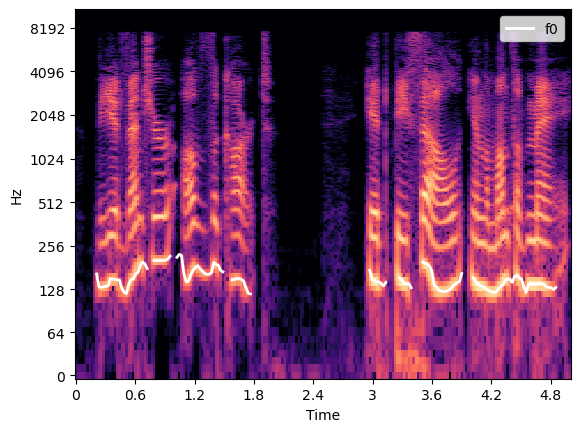

In [4]:
# Use librosa
import matplotlib.pyplot as plt

# For synthesis, we'll use mir_eval's sonify module
import mir_eval.sonify

# For audio playback, we'll use IPython.display's Audio widget
from IPython.display import Audio

import librosa

y, sr = librosa.load(librosa.ex('libri2'), duration=5)

Audio(data=y, rate=sr)
f0, voicing, voicing_probability = librosa.pyin(y=y, sr=sr, fmin=50, fmax=300)
S = np.abs(librosa.stft(y))

times = librosa.times_like(S, sr=sr)

fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, f0, linewidth=2, color='white', label='f0')
ax.legend()

[Text(0, 0.5, 'Harmonics')]

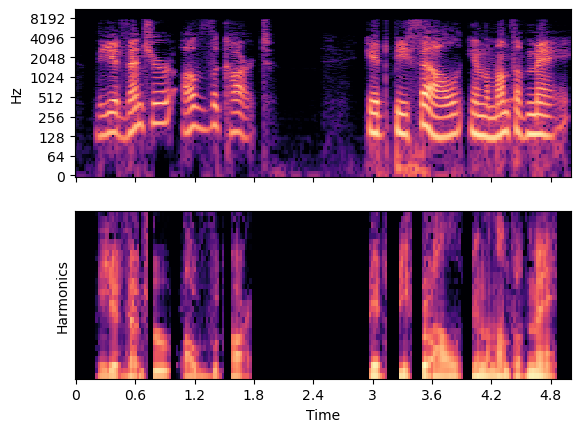

In [5]:
# Let's use the first 30 harmonics: 1, 2, 3, ..., 30
harmonics = np.arange(1, 31)

# And standard Fourier transform frequencies
frequencies = librosa.fft_frequencies(sr=sr)

harmonic_energy = librosa.f0_harmonics(S, f0=f0, harmonics=harmonics, freqs=frequencies)
# sphinx_gallery_thumbnail_number = 2

fig, ax = plt.subplots(nrows=2, sharex=True)

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
librosa.display.specshow(librosa.amplitude_to_db(harmonic_energy, ref=np.max),
                         x_axis='time', ax=ax[1])
ax[0].label_outer()
ax[1].set(ylabel='Harmonics')